In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

# PART A

CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.

OBJECTIVE:  To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

1. DATA UNDERSTANDING - 

In [2]:
#A. Read and store the csv files
normal = pd.DataFrame(pd.read_csv("Part1+-+Normal.csv"))
normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [3]:
Type_H = pd.DataFrame(pd.read_csv("Part1+-+Type_H.csv"))
Type_H.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [4]:
Type_S = pd.DataFrame(pd.read_csv("Part1+-+Type_S.csv"))
Type_S.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [5]:
#B. Print Shape and column of dataframes
print("The shape of the normal dataframe is {}, {}".format(normal.shape[0],normal.shape[1]))
print("The normal dataframe has got {} columns".format(normal.shape[1]))
print("The shape of the type h dataframe is {}, {}".format(Type_H.shape[0],Type_H.shape[1]))
print("The type h dataframe has got {} columns".format(Type_H.shape[1]))
print("The shape of the type s dataframe is {}, {}".format(Type_S.shape[0],Type_S.shape[1]))
print("The type s dataframe has got {} columns".format(Type_S.shape[1]))

The shape of the normal dataframe is 100, 7
The normal dataframe has got 7 columns
The shape of the type h dataframe is 60, 7
The type h dataframe has got 7 columns
The shape of the type s dataframe is 150, 7
The type s dataframe has got 7 columns


In [6]:
#C. Compare column names of all dataframe
def column_comparison(da,da_n):
    if len(da.columns) == len(da_n.columns):
        if len(da) != len(da_n):
            print("The dataframes have got equal number of columns but have different number of elements")
            if len(da) > len(da_n):
                print("The first dataframe is larger than the second dataframe")
            else:
                print("The first dataframe is smaller than the second dataframe")
        else:
            print("The dataframes have got equal shapes")
            
    else:
        print("The dataframes have got unequal number of columns")
        
print("Normal vs Type H:")        
column_comparison(normal,Type_H)

print("Normal vs Type S:")
column_comparison(normal,Type_S)

print("Type H vs Type S:")
column_comparison(Type_H,Type_S)

Normal vs Type H:
The dataframes have got equal number of columns but have different number of elements
The first dataframe is larger than the second dataframe
Normal vs Type S:
The dataframes have got equal number of columns but have different number of elements
The first dataframe is smaller than the second dataframe
Type H vs Type S:
The dataframes have got equal number of columns but have different number of elements
The first dataframe is smaller than the second dataframe


While observing the three dataframes, we could see that they have got same column names but the number of elements in each column are different compared to that number of elements of each column in each dataframes i.e Normal dataframe has got 100 elements, Type_H has got 60 elements and Type_S has got 150 elements in each of their columns.

In [7]:
#D. Datatypes of elements in each dataframes
normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [8]:
Type_H.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [9]:
Type_S.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [10]:
#E. Observe and share variation in class feature of dataframes
print(normal.Class.value_counts())
print(Type_H.Class.value_counts())
print(Type_S.Class.value_counts())

Normal    73
Nrmal     27
Name: Class, dtype: int64
Type_H    37
type_h    23
Name: Class, dtype: int64
Type_S    133
tp_s       17
Name: Class, dtype: int64


We see that each dataframe has got two variations respectively.

2. DATA PREPARATION AND EXPLORATION

In [11]:
#A. Unify all the variations for all dataframes
normal = normal.replace('Nrmal','Normal')
Type_H = Type_H.replace('type_h','Type_H')
Type_S = Type_S.replace('tp_s','Type_S')
normal = normal.replace('Normal','normal')
Type_H = Type_H.replace('Type_H','type_H')
Type_S = Type_S.replace('Type_S','type_S')
print(normal.Class.value_counts())
print(Type_H.Class.value_counts())
print(Type_S.Class.value_counts())

normal    100
Name: Class, dtype: int64
type_H    60
Name: Class, dtype: int64
type_S    150
Name: Class, dtype: int64


In [12]:
#B. Combine the dataframes in one dataset
from warnings import filterwarnings 
filterwarnings("ignore")
Med_Data = normal.append([Type_H,Type_S])
Med_Data_new = Med_Data.copy(deep=True)
Med_Data.shape

(310, 7)

In [13]:
#C. Print random samples of new dataset
Med_Data.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
74,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134,type_S
71,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,type_S
72,69.626283,21.122751,52.766595,48.503532,116.803091,54.816867,type_S
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,type_H
82,34.756738,2.631740,29.504381,32.124998,127.139849,-0.460894,normal


In [14]:
#D. Feature wise precentage of null values
(Med_Data.isna().sum() / Med_Data.shape[0]) * 100 

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In the above code section, we could see that not even a single feature or column has got missing values in each. 

In [15]:
#E. 5 point summary of the dataframe
Med_Data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


3. DATA ANALYSIS

<AxesSubplot: >

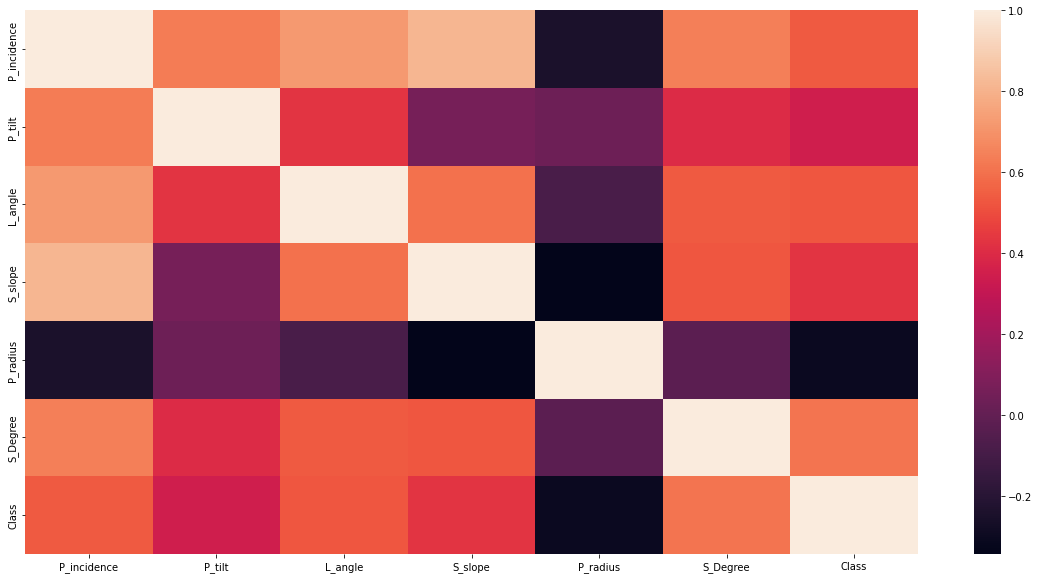

In [16]:
#A. Visualize a heatmap
#We need to convert the datatype of the feature "Class" from object to float
from sklearn.preprocessing import LabelEncoder
catoco = LabelEncoder()
Med_Data['Class'] = catoco.fit_transform(Med_Data['Class'])
corr = Med_Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=corr)

<AxesSubplot: >

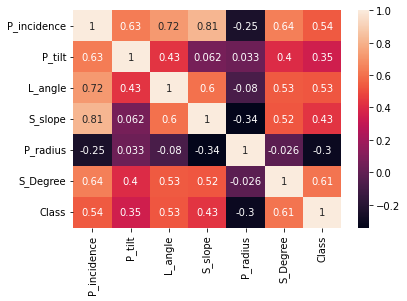

In [17]:
#B. A. Features having stronger correlation
sns.heatmap(data=corr,annot=True)

In [18]:
print(corr.values>0.7)

[[ True False  True  True False False False]
 [False  True False False False False False]
 [ True False  True False False False False]
 [ True False False  True False False False]
 [False False False False  True False False]
 [False False False False False  True False]
 [False False False False False False  True]]


P_incidence feature has got stronger correlation with other features except with P_radius 

In [19]:
#B. B. Features having weaker correlation
print(corr.values<0.2)

[[False False False False  True False False]
 [False False False  True  True False False]
 [False False False False  True False False]
 [False  True False False  True False False]
 [ True  True  True  True False  True  True]
 [False False False False  True False False]
 [False False False False  True False False]]


P_radius has got the weakest correlation when compared to other features

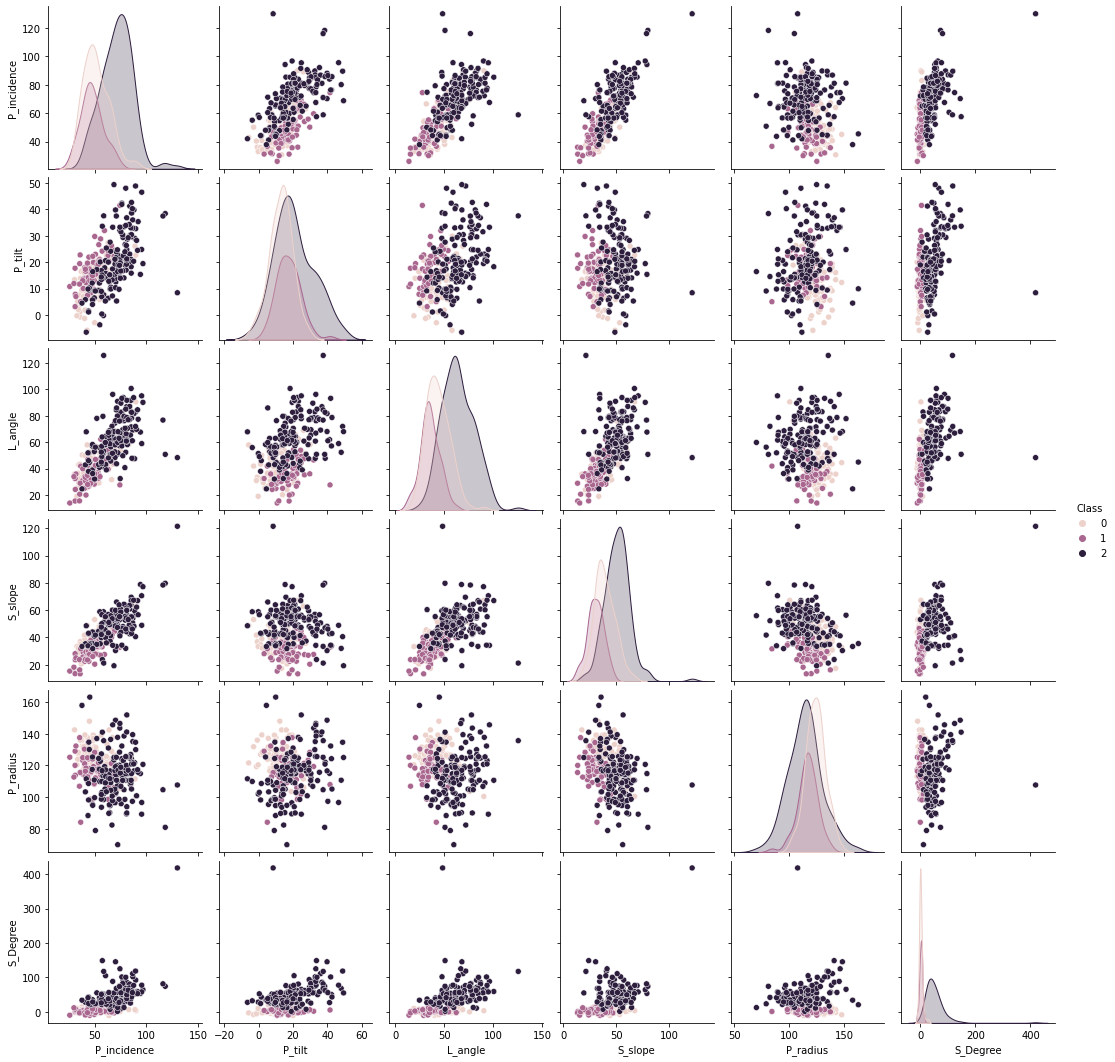

In [20]:
#C. Pairplot for all features
sns.pairplot(data=Med_Data,diag_kind='kde',hue='Class')

While observing the plots of respective features, we see that

- P_incidence has a positive correlation with other features seperately, especially higher with L_angle and S_slope

- P_tilt has got some positive correlation with P_incidence and slightly with L_angle

- L_angle has a positive correlation with S_degree, P_incidence and S_degree

- S_degree seems to have less correlation with other features as most of the datapoints are scattered in the left side near 0

- P_radius and S_slope has got some positive correlation with S_degree individually

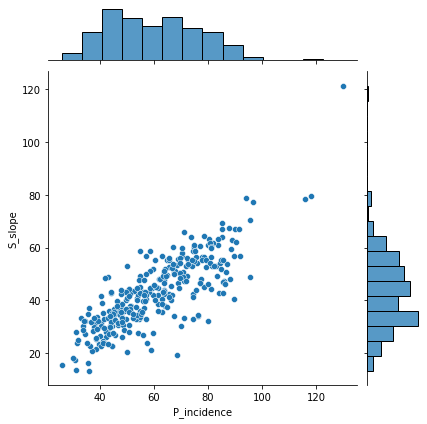

In [21]:
#D. Visualize a jointplot
sns.jointplot(data=Med_Data, x='P_incidence', y='S_slope')

Here, P_incidence has got a strong positive correlation with S_slope. Most of the data points lie in range 0 to 100 for P_incidence and 0 to 80 for S_slope. The frequency of P_incidence is approximately above 40 and for that of S_slope is below 40. 

<AxesSubplot: >

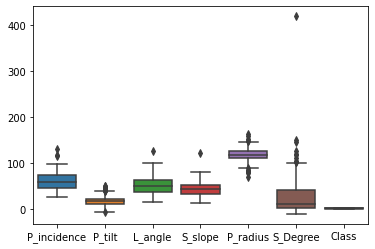

In [22]:
#E. Visualize a boxplot
sns.boxplot(data=Med_Data)

S_degree has got larger outlier compared to the other features. The quartile range of P_tilt and Class is less. The number of outliers are equally spread for P_radius. The P_incidence, L_angle and S_slope has got the perfect five plot summary.

4. MODEL BUILDING

In [23]:
#A. Split data into X and Y
X = Med_Data.drop(columns='Class')
Y = Med_Data['Class']
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [24]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [25]:
#B. Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
X_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
32,44.936675,17.443838,27.780576,27.492837,117.980324,5.569620
48,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076
62,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048


In [26]:
X_test.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
78,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247
84,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133
25,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315
70,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484
20,43.922840,14.177959,37.832547,29.744881,134.461016,6.451648


In [27]:
#C. Train a model using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,Y_train)
predictlabel = knn.predict(X_test)
print("Accuracy of KNN =",accuracy_score(Y_test,predictlabel))

Accuracy of KNN = 0.8064516129032258


In [28]:
#D. Performance metrics
from sklearn.metrics import confusion_matrix
report = classification_report(Y_test,predictlabel)
print("Training accuracy = ",knn.score(X_train,Y_train))
print("Testing accuracy = ",knn.score(X_test,Y_test))
print(report)
confusion_matrix(Y_test,predictlabel)

Training accuracy =  0.8870967741935484
Testing accuracy =  0.8064516129032258
              precision    recall  f1-score   support

           0       0.64      0.89      0.74        18
           1       0.71      0.45      0.56        11
           2       0.97      0.88      0.92        33

    accuracy                           0.81        62
   macro avg       0.77      0.74      0.74        62
weighted avg       0.83      0.81      0.80        62



array([[16,  1,  1],
       [ 6,  5,  0],
       [ 3,  1, 29]], dtype=int64)

5. PERFORMANCE IMPROVEMENT

In [29]:
#A. Experiment with various parameters
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[z for z in range(1,30)], 'leaf_size':[j for j in range(1,50)], 'p':[1,2]}
g = GridSearchCV(KNeighborsClassifier(),params,cv=10)
g_clas = g.fit(X_train,Y_train)
print("The average R2 score is : ",g_clas.best_score_)
print(g_clas.best_params_)

The average R2 score is :  0.851
{'leaf_size': 1, 'n_neighbors': 7, 'p': 1}


In [30]:
#B. Performance improvement
y_pred1 = g_clas.predict(X_test)
print("Training accuracy = ",g_clas.score(X_train,Y_train))
print("Testing accuracy = ",g_clas.score(X_test,Y_test))
print("Accuracy = ",accuracy_score(Y_test,y_pred1))
report = classification_report(Y_test,y_pred1)
print(report)
confusion_matrix(Y_test,predictlabel)

Training accuracy =  0.8669354838709677
Testing accuracy =  0.8225806451612904
Accuracy =  0.8225806451612904
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        18
           1       0.80      0.73      0.76        11
           2       0.94      0.88      0.91        33

    accuracy                           0.82        62
   macro avg       0.80      0.79      0.80        62
weighted avg       0.83      0.82      0.83        62



array([[16,  1,  1],
       [ 6,  5,  0],
       [ 3,  1, 29]], dtype=int64)

In [31]:
#C. Best parameters contributed
print('Appropriate leaf size = ',g_clas.best_estimator_.get_params()['leaf_size'])
print('Appropriate distance metric = ',g_clas.best_estimator_.get_params()['p'])
print('Appropriate number of neighbors = ',g_clas.best_estimator_.get_params()['n_neighbors'])

Appropriate leaf size =  1
Appropriate distance metric =  1
Appropriate number of neighbors =  7


# PART B

CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.

OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.

1. DATA UNDERSTANDING AND PREPARATION

In [32]:
#A. Read and store the csv files
Data1 = pd.DataFrame(pd.read_csv("Part2+-+Data1.csv"))
Data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [33]:
Data2 = pd.DataFrame(pd.read_csv("Part2+-Data2.csv"))
Data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [34]:
#B. Print shape and columns of the dataframes individually
print(Data1.shape)
Data1.info()

(5000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [35]:
print(Data2.shape)
Data2.info()

(5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [36]:
#C. Merge the dataframes to form a single dataframe 
BM_Data = pd.merge(Data1,Data2,how='outer',on='ID')
BM_Data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [37]:
#D. Change Datatype of given features to 'object'
bin_att = ["CreditCard","InternetBanking","FixedDepositAccount","Security","Level","HiddenScore"]
for att in bin_att:
    BM_Data[att] = BM_Data[att].astype('object')
BM_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


2. DATA EXPLORATION AND ANALYSIS

<AxesSubplot: xlabel='LoanOnCard', ylabel='count'>

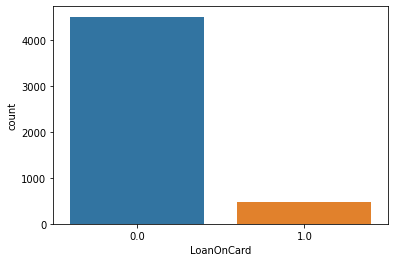

In [38]:
#A. Visualize 'LoanOnCard'
sns.countplot(data=BM_Data,x='LoanOnCard')

Here we could see that there are more than 4000 customers with no loan on card and less number of customers, nearly below 500, who have taken the loan on card.

In [39]:
#B. Percentage of missing values and impute missing values
print("There are {} missing values in the LoanOnCard feature".format(BM_Data.LoanOnCard.isnull().sum()))
#mis_per_loanoncard = (BM_Data.LoanOnCard.isnull().sum()/BM_Data.LoanOnCard.value_counts().sum())*100
#print("The percentage of missing values in the LoanOnCard feature is:",mis_per_loanoncard)
(BM_Data.isna().sum() / BM_Data.shape[0]) * 100

There are 20 missing values in the LoanOnCard feature


ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [40]:
BM_Data['LoanOnCard'] = BM_Data['LoanOnCard'].fillna(0)
BM_Data.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,0.0
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,0.0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,0.0
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,0.0
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0


In [41]:
#C. Check for unexpected value and impute with suitable value
BM_Data = BM_Data.replace('?',np.nan)
BM_Data = BM_Data.apply(lambda x: x.fillna(x.median()),axis=0)
co = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security','Level','HiddenScore','LoanOnCard']
for c in co:
    print("\n")
    print(c)
    print(BM_Data[c].value_counts())



CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


InternetBanking
1    2984
0    2016
Name: InternetBanking, dtype: int64


FixedDepositAccount
0    4698
1     302
Name: FixedDepositAccount, dtype: int64


Security
0    4478
1     522
Name: Security, dtype: int64


Level
1    2096
3    1501
2    1403
Name: Level, dtype: int64


HiddenScore
1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64


LoanOnCard
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


There seems to be no unexpected values in the above categorical features. So we can proceed further with the above features.

3. DATA PREPARATION AND MODEL BUILDING

In [42]:
#A. Split data into X and Y
X1 = BM_Data.drop(columns = ['LoanOnCard','ID','ZipCode'])
Y1 = BM_Data['LoanOnCard']
X1.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [43]:
Y1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: LoanOnCard, dtype: float64

In [44]:
#B. Split data into train and test
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=1)
X1_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
3186,41,16,98,3,1.0,1,296,0,0,0,0
632,57,32,165,4,2.7,3,0,0,0,1,0
577,52,28,149,2,6.8,1,0,0,0,1,0
2406,31,7,10,1,0.5,3,81,0,0,1,0
4686,61,35,113,2,2.8,1,0,0,0,0,0


In [45]:
X1_test.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
2764,31,5,84,1,2.9,3,105,0,0,0,1
4767,35,9,45,3,0.9,1,101,1,0,0,0
3814,34,9,35,3,1.3,1,0,0,0,0,0
3499,49,23,114,1,0.3,1,286,0,0,1,0
2735,36,12,70,3,2.6,2,165,0,0,1,0


In [46]:
#C. Train the model using logistic regression
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression(solver='liblinear')
logre.fit(X1_train,Y1_train)
logpred = logre.predict(X1_test)
problogpred = logre.fit(X1_train,Y1_train).predict_proba(X1_test)
print("Training accuracy = ",logre.score(X1_train,Y1_train))
print("Testing accuracy = ",logre.score(X1_test,Y1_test))

Training accuracy =  0.9517333333333333
Testing accuracy =  0.9448


In [47]:
#D. print evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
print(accuracy_score(Y1_test,logpred))
print(log_loss(Y1_test,logpred))
print(classification_report(Y1_test,logpred))
confusion_matrix(Y1_test,logpred)

0.9448
1.9896096670792671
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1121
         1.0       0.83      0.59      0.69       129

    accuracy                           0.94      1250
   macro avg       0.89      0.79      0.83      1250
weighted avg       0.94      0.94      0.94      1250



array([[1105,   16],
       [  53,   76]], dtype=int64)

In [48]:
#E. Balance data 
Y1_train.value_counts()

0.0    3399
1.0     351
Name: LoanOnCard, dtype: int64

<AxesSubplot: >

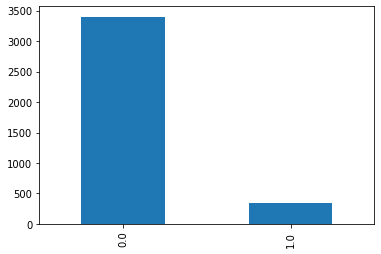

In [49]:
Y1_train.value_counts().plot(kind='bar')

In [50]:
from imblearn.datasets import make_imbalance
X2_train, Y2_train = make_imbalance(X1_train,Y1_train,sampling_strategy={0:350, 1:350},random_state=0)
Y2_train.value_counts()

0.0    350
1.0    350
Name: LoanOnCard, dtype: int64

In [51]:
#F. Train the previous model with new dataset
logre = LogisticRegression(solver='liblinear')
logre.fit(X2_train,Y2_train)
logpred2 = logre.predict(X1_test)
problogpred2 = logre.fit(X2_train,Y2_train).predict_proba(X1_test)
print("Training accuracy = ",logre.score(X2_train,Y2_train))
print("Testing accuracy = ",logre.score(X1_test,Y1_test))

Training accuracy =  0.9085714285714286
Testing accuracy =  0.8808


In [52]:
#G. Evaluation metrics of new model
print(accuracy_score(Y1_test,logpred2))
print(log_loss(Y1_test,logpred2))
print(classification_report(Y1_test,logpred2))
confusion_matrix(Y1_test,logpred2)

0.8808
4.296403483982765
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1121
         1.0       0.46      0.89      0.61       129

    accuracy                           0.88      1250
   macro avg       0.72      0.89      0.77      1250
weighted avg       0.93      0.88      0.90      1250



array([[986, 135],
       [ 14, 115]], dtype=int64)

The model built before balancing the dataset and after balancing the dataset performed pretty well as they have got the approximate accuracy in both training and testing dataset. But there was some difference between the accuracy of the logistic regression model between training data of the original dataset and that of the dataset after balancing the target feature.

In [53]:
print("The percentage difference between training accuracy of original dataset and balanced dataset is = ",(logre.score(X2_train,Y2_train) - (logre.score(X1_train,Y1_train)))*100)

The percentage difference between training accuracy of original dataset and balanced dataset is =  2.1371428571428597


4. PERFORMANCE IMPROVEMENT

In [54]:
#A. Train a model using SVM, KNN
#The below model uses the original dataset
from sklearn import svm
#KNN Model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X1_train,Y1_train)
predictlabel1 = knn.predict(X1_test)
proba_predictlabel1 = knn.fit(X1_train,Y1_train).predict_proba(X1_test)
print("Training accuracy = ",knn.score(X1_train,Y1_train))
print("Testing accuracy = ",knn.score(X1_test,Y1_test))

Training accuracy =  0.9570666666666666
Testing accuracy =  0.9056


In [55]:
#The below model uses the new dataset after balancing the dataset
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X2_train,Y2_train)
predictlabel11 = knn.predict(X1_test)
proba_predictlabel11 = knn.fit(X2_train,Y2_train).predict_proba(X1_test)
print("Training accuracy = ",knn.score(X2_train,Y2_train))
print("Testing accuracy = ",knn.score(X1_test,Y1_test))

Training accuracy =  0.9057142857142857
Testing accuracy =  0.8224


In [56]:
#The below model uses the original dataset
#SVM Model
SVM = svm.SVC(gamma=1,C=0.1,probability=True)
SVM.fit(X1_train,Y1_train)
predictlabel2 = SVM.predict(X1_test)
proba_predictlabel2 = SVM.fit(X1_train,Y1_train).predict_proba(X1_test)
print("Training accuracy = ",SVM.score(X1_train,Y1_train))
print("Testing accuracy = ",SVM.score(X1_test,Y1_test))

Training accuracy =  0.9064
Testing accuracy =  0.8968


In [57]:
#The below model uses the new dataset after balancing the dataset
SVM.fit(X2_train,Y2_train)
predictlabel21 = SVM.predict(X1_test)
proba_predictlabel21 = SVM.fit(X2_train,Y2_train).predict_proba(X1_test)
print("Training accuracy = ",SVM.score(X2_train,Y2_train))
print("Testing accuracy = ",SVM.score(X1_test,Y1_test))

Training accuracy =  1.0
Testing accuracy =  0.1192


In [58]:
#B. Tune parameters for SVM, KNN individually
from sklearn.model_selection import GridSearchCV
params1 = {'n_neighbors':[z for z in range(1,30)], 'leaf_size':[j for j in range(1,30)], 'p':[1,2]}
g1 = GridSearchCV(KNeighborsClassifier(),params1,cv=10)
g_clas_1 = g1.fit(X1_train,Y1_train)
g_clas_1_prob = g1.fit(X1_train,Y1_train).predict_proba(X1_test)
g1pred1 = g_clas_1.predict(X1_test)
g_clas_2 = g1.fit(X2_train,Y2_train)
g_clas_2_prob = g1.fit(X2_train,Y2_train).predict_proba(X1_test)
g1pred2 = g_clas_2.predict(X1_test)
print("The average R2 score is of original dataset is : ",g_clas_1.best_score_)
print("The average R2 score is of balanced dataset is : ",g_clas_2.best_score_)
print(g_clas_1.best_params_)
print(g_clas_2.best_params_)

The average R2 score is of original dataset is :  0.8814285714285713
The average R2 score is of balanced dataset is :  0.8814285714285713
{'leaf_size': 1, 'n_neighbors': 15, 'p': 1}
{'leaf_size': 1, 'n_neighbors': 15, 'p': 1}


In [60]:
params2 = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}
g2 = GridSearchCV(svm.SVC(probability=True),params2,refit=True,verbose=1)
g2_clas_1 = g2.fit(X1_train,Y1_train)
g2_clas_1_prob = g2.fit(X1_train,Y1_train).predict_proba(X1_test)
g2pred1 = g2_clas_1.predict(X1_test)
g2_clas_2 = g2.fit(X2_train,Y2_train)
g2_clas_2_prob = g2.fit(X2_train,Y2_train).predict_proba(X1_test)
g2pred2 = g2_clas_2.predict(X1_test)
print("The average R2 score is of original dataset is : ",g2_clas_1.best_score_)
print("The average R2 score is of balanced dataset is : ",g2_clas_2.best_score_)
print(g2_clas_1.best_params_)
print(g2_clas_2.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
The average R2 score is of original dataset is :  0.8714285714285716
The average R2 score is of balanced dataset is :  0.8714285714285716
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [61]:
#C. Evaluation metrics
#KNN
print(classification_report(Y1_test,predictlabel1))
print(classification_report(Y1_test,predictlabel11))
print(classification_report(Y1_test,g1pred1))
print(classification_report(Y1_test,g1pred2))
#confusion_matrix(Y1_test,predictlabel1)

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1121
         1.0       0.56      0.41      0.47       129

    accuracy                           0.91      1250
   macro avg       0.75      0.69      0.71      1250
weighted avg       0.90      0.91      0.90      1250

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      1121
         1.0       0.36      0.90      0.51       129

    accuracy                           0.82      1250
   macro avg       0.67      0.86      0.70      1250
weighted avg       0.92      0.82      0.85      1250

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1121
         1.0       0.79      0.32      0.45       129

    accuracy                           0.92      1250
   macro avg       0.86      0.65      0.71      1250
weighted avg       0.91      0.92      0.91      1250

              preci

In [62]:
#SVM
print(classification_report(Y1_test,predictlabel2))
print(classification_report(Y1_test,predictlabel21))
print(classification_report(Y1_test,g2pred1))
print(classification_report(Y1_test,g2pred2))
#confusion_matrix(Y1_test,predictlabel2)

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1121
         1.0       0.00      0.00      0.00       129

    accuracy                           0.90      1250
   macro avg       0.45      0.50      0.47      1250
weighted avg       0.80      0.90      0.85      1250

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04      1121
         1.0       0.10      1.00      0.19       129

    accuracy                           0.12      1250
   macro avg       0.55      0.51      0.11      1250
weighted avg       0.91      0.12      0.05      1250

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1121
         1.0       0.78      0.74      0.76       129

    accuracy                           0.95      1250
   macro avg       0.87      0.86      0.86      1250
weighted avg       0.95      0.95      0.95      1250

              preci

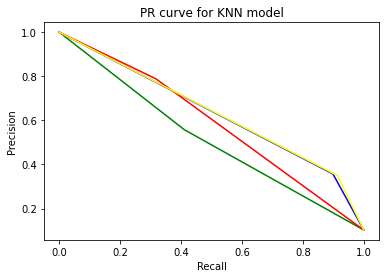

In [63]:
#D. Improvements shown from base model to final model
#KNN
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(Y1_test,predictlabel1)
precision1,recall1,thresholds1 = precision_recall_curve(Y1_test,predictlabel11)
precisionk1,recallk1,thresholdsk1 = precision_recall_curve(Y1_test,g1pred1)
precisionk2,recallk2,thresholdsk2 = precision_recall_curve(Y1_test,g1pred2)
plt.plot(recall,precision,color='green')
plt.plot(recall1,precision1,color='blue')
plt.plot(recallk1,precisionk1,color='red')
plt.plot(recallk2,precisionk2,color='yellow')
plt.title("PR curve for KNN model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

We could see in the above graph that the precision of the blue line, which is the KNN model built using the balanced dataset is slightly higher than that of the green line i.e KNN model built using the original dataset.

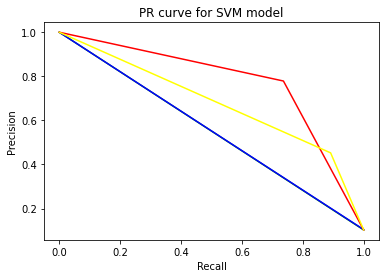

In [64]:
#SVM
precision2,recall2,thresholds2 = precision_recall_curve(Y1_test,predictlabel2)
precision3,recall3,thresholds3 = precision_recall_curve(Y1_test,predictlabel21)
precisions1,recalls1,thresholdss1 = precision_recall_curve(Y1_test,g2pred1)
precisions2,recalls2,thresholdss2 = precision_recall_curve(Y1_test,g2pred2)
plt.plot(recall2,precision2,color='green')
plt.plot(recall3,precision3,color='blue')
plt.plot(recalls1,precisions1,color='red')
plt.plot(recalls2,precisions2,color='yellow')
plt.title("PR curve for SVM model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

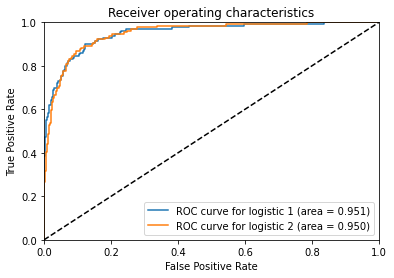

In [67]:
from sklearn.metrics import roc_curve, auc
fpl1, tpl1, tl1 = roc_curve(Y1_test,problogpred[:,1])
fpl2, tpl2, tl2 = roc_curve(Y1_test,problogpred2[:,1])
fpk1, tpk1, tk1 = roc_curve(Y1_test,proba_predictlabel1[:,1])
fpk2, tpk2, tk2 = roc_curve(Y1_test,proba_predictlabel11[:,1])
fpk3, tpk3, tk3 = roc_curve(Y1_test,g_clas_1_prob[:,1])
fpk4, tpk4, tk4 = roc_curve(Y1_test,g_clas_2_prob[:,1])
fps1, tps1, ts1 = roc_curve(Y1_test,proba_predictlabel2[:,1])
fps2, tps2, ts2 = roc_curve(Y1_test,proba_predictlabel21[:,1])
fps3, tps3, ts3 = roc_curve(Y1_test,g2_clas_1_prob[:,1])
fps4, tps4, ts4 = roc_curve(Y1_test,g2_clas_2_prob[:,1])
roc_aucl1 = auc(fpl1,tpl1)
roc_aucl2 = auc(fpl2,tpl2)
roc_auck1 = auc(fpk1,tpk1)
roc_auck2 = auc(fpk2,tpk2)
roc_auck3 = auc(fpk3,tpk3)
roc_auck4 = auc(fpk4,tpk4)
roc_aucs1 = auc(fps1,tps1)
roc_aucs2 = auc(fps2,tps2)
roc_aucs3 = auc(fps3,tps3)
roc_aucs4 = auc(fps4,tps4)
plt.clf()
plt.plot(fpl1,tpl1,label='ROC curve for logistic 1 (area = %0.3f)' % roc_aucl1)
plt.plot(fpl2,tpl2,label='ROC curve for logistic 2 (area = %0.3f)' % roc_aucl2)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc='lower right')
plt.show()

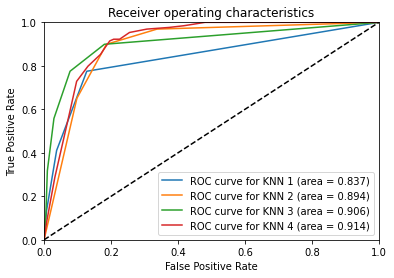

In [69]:
plt.clf()
plt.plot(fpk1,tpk1,label='ROC curve for KNN 1 (area = %0.3f)' % roc_auck1)
plt.plot(fpk2,tpk2,label='ROC curve for KNN 2 (area = %0.3f)' % roc_auck2)
plt.plot(fpk3,tpk3,label='ROC curve for KNN 3 (area = %0.3f)' % roc_auck3)
plt.plot(fpk4,tpk4,label='ROC curve for KNN 4 (area = %0.3f)' % roc_auck4)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc='lower right')
plt.show()

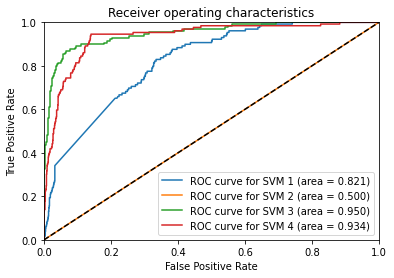

In [70]:
plt.clf()
plt.plot(fps1,tps1,label='ROC curve for SVM 1 (area = %0.3f)' % roc_aucs1)
plt.plot(fps2,tps2,label='ROC curve for SVM 2 (area = %0.3f)' % roc_aucs2)
plt.plot(fps3,tps3,label='ROC curve for SVM 3 (area = %0.3f)' % roc_aucs3)
plt.plot(fps4,tps4,label='ROC curve for SVM 4 (area = %0.3f)' % roc_aucs4)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc='lower right')
plt.show()

After observing the above ROC curves for logistic regression, K Nearest Neighbor and Supprt Vector Machine models (1 - original dataset, 2 - balanced dataset, 3 - original dataset with hypertuned parameters and 4 - balanced dataset with hypertuned parameters), we can clearly see that the logistic regression model performance is nearly accurate in both the datasets, but in the case of KNN and SVM, the final models with original, balanced dataset and hypertuned parameters seems to perform better than the original dataset with random parameters.